# InstaStats: Unveiling Instagram Insights (EDA)

**Domain: Social Media**

**Context:**

Data Analyst Duo is an instagram community (@𝒅𝒂𝒕𝒂𝒂𝒏𝒂𝒍𝒚𝒔𝒕𝒅𝒖𝒐) of ~𝟕9𝐤 data enthusiasts founded by two individuals Aditi & Kalpesh. They share content around statistics, data science & analytics with budding data aspirants. 

**Data:** 
dataanalystduo instagram analytics.xlsx- : The data set contains stats about the channel (@𝒅𝒂𝒕𝒂𝒂𝒏𝒂𝒍𝒚𝒔𝒕𝒅𝒖𝒐)

**Data Dictionary:**

* Date: Date 
* Instagram reach: The number of unique accounts that saw any of your posts or stories at least once. Reach is different from impressions, which may include multiple views of your posts by the same accounts. This metric is estimated.
* Instagram profile visits: The number of times your profile was visited.
* New Instagram followers: The number of new accounts that started following your Instagram account.
* Title: Title of the post
* Post type: Type of post - IG video, IG carousel, IG Image
* Impressions: The number of times your post was viewed
* Reach: The number of accounts your post was reached
* Shares: The number of times you post was shared
* Follows: The number of new accounts that started following your Instagram account.
* Likes: The number of likes on the post
* Comments: The number of comments on the post
* Saves: The number of saves on the post

**Project Objective**

The goal is to analyse the data and provide recommendations on what type of post are working for the page. 

*Note*

*- Unauthorised use or distribution of this project prohibited @dataanalystduo

*- Dataset is owned by @dataanalystduo page & instagram.


**Key learning after this project:**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset.
Observation writing involves examining the data and noting any notable findings, anomalies, or areas of interest.
Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to understand its main characteristics, such as the distribution of data, the relationships between variables, and any anomalies or patterns that may exist. The goal of EDA is to uncover insights and trends that can help inform further analysis or decision-making. It is often the first step in any data analysis project, as it provides a foundation for more advanced statistical methods and models.

In [1]:
# Import Libraries for data cleaning & data analysis & data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the xlsx file into python

df = pd.read_excel(r'D:\Data_Analyst_duo\batch2day2\dataanalystduo_instagram_analytics_batch2.xlsx', sheet_name='data')

### Section A: Explore the Dataset

In [3]:
# View to Snapshot of data - first 5 rows

df.head()

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
0,2022-01-01T00:00:00,348,70,0,0,0,0.0,0.0,0,0.0,0,0,0
1,2022-01-02T00:00:00,497,100,0,0,0,0.0,0.0,0,0.0,0,0,0
2,2022-01-03T00:00:00,2745,249,0,0,0,0.0,0.0,0,0.0,0,0,0
3,2022-01-04T00:00:00,1619,154,0,0,0,0.0,0.0,0,0.0,0,0,0
4,2022-01-05T00:00:00,2434,195,0,0,0,0.0,0.0,0,0.0,0,0,0


In [4]:
# View to Snapshot of data - Last 5 rows

df.tail()

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
480,2023-04-26T00:00:00,32378,447,89,ChatGPT with Jupyter notebook,IG video,64045.0,62424.0,1239,10.0,2648,41,3368
481,2023-04-27T00:00:00,31429,475,128,why documentation is important,IG video,18247.0,14951.0,47,0.0,958,17,276
482,2023-04-28T00:00:00,20506,363,89,Udemy courses meme,IG video,13282.0,10231.0,5,0.0,281,7,34
483,2023-04-29T00:00:00,13472,345,78,1:1 consultation,IG carousel,12847.0,8938.0,14,0.0,296,0,130
484,2023-04-30T00:00:00,27194,671,59,Statistics interview question,IG video,36419.0,31734.0,76,NaN,1151,201,455


By looking at the data, we can see the issue with the date column. We will fix it.

In [5]:
# Size of data

df.shape

(485, 13)

There are 485 rows and 13 columns in the dataframe

In [6]:
# Get more information about datatypes and null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      485 non-null    object 
 1   Instagram reach           485 non-null    int64  
 2   Instagram profile visits  485 non-null    int64  
 3   New Instagram followers   485 non-null    int64  
 4   Title                     485 non-null    object 
 5   Post type                 485 non-null    object 
 6   Impressions               485 non-null    float64
 7   Reach                     485 non-null    float64
 8   Shares                    485 non-null    int64  
 9   Follows                   484 non-null    float64
 10  Likes                     485 non-null    int64  
 11  Comments                  485 non-null    int64  
 12  Saves                     485 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 49.4+ KB


### Section B: Clean the Dataset

In [7]:
# Let us first start with Club column

df['Date']= df['Date'].str.split('T').str[0]

#In the above example, str.split('T') splits the string in the "date_column" on the "T" character
#str[0] selects the first part of the resulting split, which is the date part before the "T". 

In [8]:
df.head()

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
0,2022-01-01,348,70,0,0,0,0.0,0.0,0,0.0,0,0,0
1,2022-01-02,497,100,0,0,0,0.0,0.0,0,0.0,0,0,0
2,2022-01-03,2745,249,0,0,0,0.0,0.0,0,0.0,0,0,0
3,2022-01-04,1619,154,0,0,0,0.0,0.0,0,0.0,0,0,0
4,2022-01-05,2434,195,0,0,0,0.0,0.0,0,0.0,0,0,0


In [9]:
# Convert the 'date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      485 non-null    datetime64[ns]
 1   Instagram reach           485 non-null    int64         
 2   Instagram profile visits  485 non-null    int64         
 3   New Instagram followers   485 non-null    int64         
 4   Title                     485 non-null    object        
 5   Post type                 485 non-null    object        
 6   Impressions               485 non-null    float64       
 7   Reach                     485 non-null    float64       
 8   Shares                    485 non-null    int64         
 9   Follows                   484 non-null    float64       
 10  Likes                     485 non-null    int64         
 11  Comments                  485 non-null    int64         
 12  Saves                 

In [10]:
#Check total number of rows in all the columns without zero values

columns_to_check = ['Date', 'Instagram reach', 'Instagram profile visits', 'New Instagram followers', 'Title', 'Post type', 'Impressions', 'Reach', 'Shares', 'Follows', 'Likes', 'Comments', 'Saves']

for column in columns_to_check:
    non_zero_count = df[column].value_counts().drop(0, errors='ignore').sum()
    print("Number of rows without zero values in column '{}': {}".format(column, non_zero_count))

Number of rows without zero values in column 'Date': 485
Number of rows without zero values in column 'Instagram reach': 485
Number of rows without zero values in column 'Instagram profile visits': 485
Number of rows without zero values in column 'New Instagram followers': 287
Number of rows without zero values in column 'Title': 89
Number of rows without zero values in column 'Post type': 89
Number of rows without zero values in column 'Impressions': 89
Number of rows without zero values in column 'Reach': 89
Number of rows without zero values in column 'Shares': 88
Number of rows without zero values in column 'Follows': 68
Number of rows without zero values in column 'Likes': 88
Number of rows without zero values in column 'Comments': 85
Number of rows without zero values in column 'Saves': 88


We will loop through each column in the list and use the value_counts() method to get the count of each unique value, and the drop(0) method to remove the count of zero values. Finally, we use the sum() method to get the total count of non-zero values in each column, and print the results.

### Section C: Data Analysis

In [11]:
# check the trend for the following columns 'Instagram reach, Instagram profile visits, New Instagram followers'

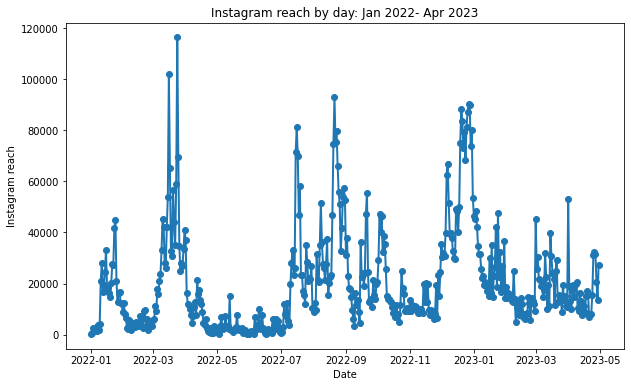

In [12]:
#Instagram reach

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
plt.plot(df['Date'], df['Instagram reach'], marker='o', markersize=6, linewidth=2)

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Instagram reach')

# Set the title
plt.title('Instagram reach by day: Jan 2022- Apr 2023')

# Show the plot
plt.show()

**The reach trend exhibits a highly volatile pattern, with three notable instances of significant increases in reach observed around March/April 2022, August/September 2022, and December/January 2023.**

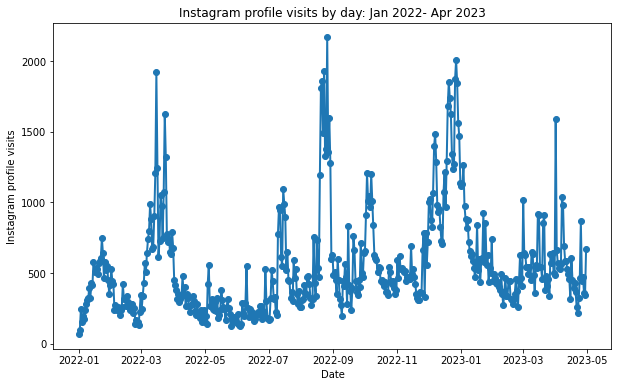

In [13]:
#Instagram profile visits

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
plt.plot(df['Date'], df['Instagram profile visits'], marker='o', markersize=6, linewidth=2)

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Instagram profile visits')

# Set the title
plt.title('Instagram profile visits by day: Jan 2022- Apr 2023')

# Show the plot
plt.show()

**We can see similar trend in number of profile visits as well.**

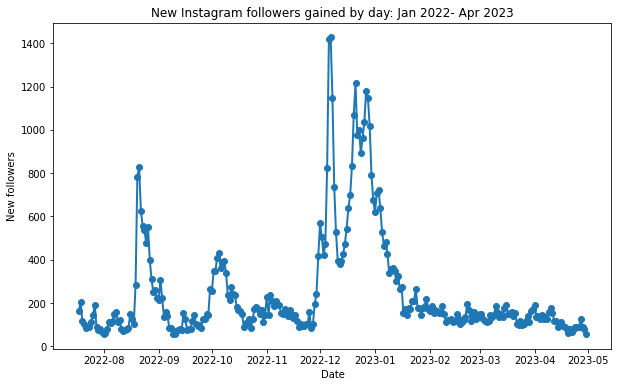

In [14]:
#New Instagram followers

# Set the figure size
plt.figure(figsize=(10, 6))

df_followers = df[df['New Instagram followers']!=0]

# Create the line chart
plt.plot(df_followers['Date'], df_followers['New Instagram followers'], marker='o', markersize=6, linewidth=2)

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('New followers')

# Set the title
plt.title('New Instagram followers gained by day: Jan 2022- Apr 2023')

# Show the plot
plt.show()

**On a daily basis, the number of new followers gained hovers around 200. However, a remarkable surge in the count of new followers was witnessed during the period from December 2022 to January 2023.**


Let's try to understand what exactly happenend during this period. 

In [15]:
#We will begin by determining the start date for which the posts' insights are available.
df_Title = df[df['Title']!=0]

# Check the minimum and maximum date in the filtered dataframe
min_date = df_Title['Date'].min()
max_date = df_Title['Date'].max()

print("Minimum Date: ", min_date)
print("Maximum Date: ", max_date)

Minimum Date:  2022-09-12 00:00:00
Maximum Date:  2023-04-30 00:00:00


In [16]:
df_Title.head()

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
254,2022-09-12,13732,563,76,how to reach out to people of linkedin,IG video,18762.0,17879.0,51,0.0,630,11,244
257,2022-09-15,36445,832,153,time allocation to study,IG image,169062.0,164673.0,438,481.0,2450,46,3181
259,2022-09-17,24188,373,77,responding to dms,IG video,15674.0,14551.0,21,0.0,312,8,25
262,2022-09-20,47147,764,117,print hello world,IG video,571748.0,554639.0,5030,0.0,17797,224,13544
269,2022-09-27,21301,711,128,data lemur problem solving,IG video,22260.0,19708.0,102,0.0,791,94,572


**Considering Dec 2022 and Jan 2023 data**

In [17]:
df_dec_jan = df_Title[(df_Title['Date']>=pd.Timestamp('2022-12-01')) & (df_Title['Date']<=pd.Timestamp('2023-01-31'))]

In [18]:
df_dec_jan.head()

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
335,2022-12-02,30583,1024,504,How to find a good project idea?,IG video,14050.0,14600.0,51,504.0,657,0,279
336,2022-12-03,32112,875,421,What is Data Analytics?,IG video,67050.0,67600.0,742,421.0,2800,38,335
337,2022-12-04,30851,829,475,Why data is considered as valuable resource?,IG video,10450.0,11000.0,26,475.0,454,3,388
338,2022-12-05,39611,1069,823,Coding Blocks,IG video,20650.0,21200.0,271,823.0,720,7,334
339,2022-12-06,62370,1399,1418,Is MEDIAN better than MEAN?,IG video,16650.0,17200.0,50,1418.0,893,16,578


In [19]:
# Define aggregation functions
agg_funcs = {'Title': 'count', 'Impressions': 'mean', 'Reach': 'mean', 'Shares': 'mean', 'Likes': 'mean', 'Comments': 'mean', 'Saves': 'mean'}  # Example: 'sum', 'mean', 'median', 'min', 'max', etc.

df_dec_jan_pivot = round(pd.pivot_table(df_dec_jan, index = 'Post type', values = ['Title', 'Impressions', 'Reach', 'Shares', 'Likes', 'Comments', 'Saves'], aggfunc=agg_funcs))
df_dec_jan_pivot

,Comments,Impressions,Likes,Reach,Saves,Shares,Title
Post type,,,,,,,
IG video,34.0,67288.0,2563.0,65636.0,697.0,1182.0,39


**Comments**: On average, the IG videos received 34 comments per video. This metric indicates the average level of engagement and interaction with the videos in terms of comments.

**Impressions**: On average, the IG videos garnered 67,288 impressions per video. Impressions refer to the average number of times the videos were viewed by users, whether or not they engaged with the content. This metric provides an indication of the average overall reach and visibility of the videos.

**Likes**: On average, the IG videos received 2,563 likes per video. Likes are a common engagement metric on Instagram, reflecting the average number of users who showed appreciation for the videos by liking them.

**Reach**: On average, the IG videos reached 65,636 users per video. Reach represents the average unique number of users who viewed the videos. It provides insights into the average audience reached by the videos, indicating the potential impact and exposure of the content.

**Saves**: On average, the IG videos were saved by 697 users per video. Saves represent the average number of times users saved the videos to their collections for later viewing. This metric reflects the average level of interest and value users found in the videos.

**Shares**: On average, the IG videos were shared by 1,182 users per video. Shares represent the average number of times users 
shared the videos with their own followers, extending the reach and potential exposure of the content.

**Consistent upload of videos have performed good for Data Analyst Duo**

**Let us look at that time of the data where Data Analyst Duo have released different types of post.**

In [20]:
# Define aggregation functions
agg_funcs = {'Title': 'count', 'Impressions': 'mean', 'Reach': 'mean', 'Shares': 'mean', 'Likes': 'mean', 'Comments': 'mean', 'Saves': 'mean'}  # Example: 'sum', 'mean', 'median', 'min', 'max', etc.

# Create pivot table
df_Title_pivot = round(pd.pivot_table(df_Title, index = 'Post type', values = ['Title', 'Impressions', 'Reach', 'Shares', 'Likes', 'Comments', 'Saves'], aggfunc=agg_funcs))
df_Title_pivot

,Comments,Impressions,Likes,Reach,Saves,Shares,Title
Post type,,,,,,,
IG carousel,41.0,40784.0,1484.0,31371.0,1654.0,214.0,14
IG image,44.0,61590.0,1356.0,58822.0,864.0,124.0,4
IG video,34.0,58629.0,2149.0,55924.0,851.0,787.0,71


Based on the given pivot table, the following observations and insights can be inferred:

The 'IG image' post type has the highest average values for most of the metrics including 'Comments', 'Impressions', 'Likes', 'Reach', 'Saves', and 'Shares', compared to 'IG carousel' and 'IG video' post types. This suggests that 'IG image' posts may be performing better in terms of engagement on average compared to the other two types of posts. But the sample of 'IG image' is 4 compared to 'IG carousel' 14 and 'IG video' 71. 

Let us look at the 'IG image' data once before we make any conclusion.

In [21]:
df_Title[(df_Title['Post type']=='IG image')]

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
257,2022-09-15,36445,832,153,time allocation to study,IG image,169062.0,164673.0,438,481.0,2450,46,3181
274,2022-10-02,29154,914,347,your favourite data couple,IG image,20346.0,19026.0,6,24.0,817,8,12
450,2023-03-27,19409,637,117,Introduction post,IG image,22446.0,20500.0,12,4.0,1566,34,47
463,2023-04-09,20627,695,160,Statistics for data analysis workshop,IG image,34504.0,31088.0,41,7.0,592,88,216


In [22]:
df_IG_image = df_Title[(df_Title['Post type']=='IG image') & (df_Title['Title']!= 'time allocation to study')]
df_IG_image

,Date,Instagram reach,Instagram profile visits,New Instagram followers,Title,Post type,Impressions,Reach,Shares,Follows,Likes,Comments,Saves
274,2022-10-02,29154,914,347,your favourite data couple,IG image,20346.0,19026.0,6,24.0,817,8,12
450,2023-03-27,19409,637,117,Introduction post,IG image,22446.0,20500.0,12,4.0,1566,34,47
463,2023-04-09,20627,695,160,Statistics for data analysis workshop,IG image,34504.0,31088.0,41,7.0,592,88,216


In [23]:
df_IG_image = round(pd.pivot_table(df_IG_image, index = 'Post type', values = ['Impressions', 'Reach', 'Shares', 'Likes', 'Comments', 'Saves'], aggfunc=np.mean))
df_IG_image

,Comments,Impressions,Likes,Reach,Saves,Shares
Post type,,,,,,
IG image,43.0,25765.0,992.0,23538.0,92.0,20.0


In [24]:
#Let us exclude the post with title 'time allocation to study'

df_Title = df_Title[(df_Title['Title']!= 'time allocation to study')]

# Create pivot table
df_Title_pivot = round(pd.pivot_table(df_Title, index = 'Post type', values = ['Title', 'Impressions', 'Reach', 'Shares', 'Likes', 'Comments', 'Saves'], aggfunc=agg_funcs))
df_Title_pivot

,Comments,Impressions,Likes,Reach,Saves,Shares,Title
Post type,,,,,,,
IG carousel,41.0,40784.0,1484.0,31371.0,1654.0,214.0,14
IG image,43.0,25765.0,992.0,23538.0,92.0,20.0,3
IG video,34.0,58629.0,2149.0,55924.0,851.0,787.0,71


### Conclusion:

Based on the observations, it appears that 'IG video' posts are performing better in terms of engagement compared to 'IG image' and 'IG carousel' posts for Data Analyst Duo. The comparative analysis showed that 'IG video' posts have the highest average values for most of the metrics, including 'Comments', 'Impressions', 'Likes', 'Reach', 'Saves', and 'Shares'. This suggests that 'IG videos' posts may be more effective in increasing engagement for Data Analyst Duo. They can leverage the higher performance of 'IG video' posts to create engaging content that resonates with their audience and consistently monitor the performance of their posts to further optimize their content strategy and continue to engage their followers effectively.